# AEBS - AEJxLPS_2F and AEJxPBS_2F products - long-term temporal development
Demonstration of `AEJxLPS_2F` and `AEJxPBS_2F` products.

Feel free to change the `SPACECRAFT`, `START_TIME`, and `END_TIME` paramteres and re-run the notebook.

The notebook retrieves and displays data for the selected satellite and time range.

In [1]:
#------------------------------------------------------------------------------
# User input:

SPACECRAFT = 'A'
START_TIME = '2015-06-15T00:00:00Z'
END_TIME = '2015-06-30T00:00:00Z'

SERVER_URL = 'https://staging.viresdisc.vires.services/ows'

#------------------------------------------------------------------------------

from viresclient import SwarmRequest
from viresclient._wps.time_util import parse_datetime

# point types
MASK_EJ_TYPE = PT_EEJ = 0x1
MASK_POINT_TYPE = PT_BOUNDARY = 0x2
MASK_BOUNDARY_TYPE = PT_POLAR = 0x4
MASK_BOUNDARY_FLAG = PT_END = 0x8
PT_WEJ = PT_PEAK = PT_EQUATORIAL = PT_START = 0x0

SwarmRequest.COLLECTIONS.update({
    'AEJ_LPS': ['SW_OPER_AEJ{}LPS_2F'.format(x) for x in 'ABC'],
    'AEJ_PBS': ['SW_OPER_AEJ{}PBS_2F'.format(x) for x in 'ABC'],
    'AEJ_PBS:GroundMagneticDisturbance': [
        'SW_OPER_AEJ{}PBS_2F:GroundMagneticDisturbance'.format(x) for x in 'ABC'
    ],
})

SwarmRequest.PRODUCT_VARIABLES.update({
    'AEJ_LPS': [
        'Latitude_QD', 'Longitude_QD', 'MLT_QD',
        'J_CF_NE', 'J_DF_NE', 'J_CF_SemiQD', 'J_DF_SemiQD', 'J_R'
    ],
    'AEJ_PBS': [
        'Latitude_QD', 'Longitude_QD', 'MLT_QD',
        'J_DF_SemiQD', 'Flags', 'PointType',
    ],
    'AEJ_PBS:GroundMagneticDisturbance': ['B'],
})

try:
    request = SwarmRequest(SERVER_URL)

    start_orbit_number = request.get_orbit_number(SPACECRAFT, parse_datetime(START_TIME))
    end_orbit_number = request.get_orbit_number(SPACECRAFT, parse_datetime(END_TIME))
    start_time, end_time =  request.get_times_for_orbits(SPACECRAFT, start_orbit_number, end_orbit_number)
    print('Spacecraft:         %s' % SPACECRAFT)
    print('Orbit number range: %s-%s' % (start_orbit_number, end_orbit_number))
    print('Start time:       ', start_time)
    print('End time:         ', end_time)
    
    # retrieve latitude profiles
    request.set_collection('SW_OPER_AEJ%sLPS_2F' % SPACECRAFT)
    request.set_products(
        #measurements=['Latitude_QD', 'Longitude_QD', 'MLT_QD', 'J_CF_NE', 'J_DF_NE', 'J_CF_SemiQD', 'J_DF_SemiQD', 'J_R'],
        measurements=['Latitude_QD', 'MLT_QD', 'J_DF_SemiQD'],
        auxiliaries=['QDOrbitDirection', 'OrbitNumber'],
        sampling_step="PT5S",
    )
    response = request.get_between(
        start_time=start_time,
        end_time=end_time,
        asynchronous=False,
    )
    print('Sources:\n\t%s' % '\n\t'.join(response.sources))
    profile = response.as_xarray()
    
    # retrieve peeks and boundaries
    request.set_collection('SW_OPER_AEJ%sPBS_2F' % SPACECRAFT)
    request.set_products(
        #measurements=['Latitude_QD', 'Longitude_QD', 'MLT_QD', 'J_DF_SemiQD', 'Flags', 'PointType'],
        measurements=['Latitude_QD', 'MLT_QD', 'J_DF_SemiQD', 'Flags', 'PointType'],
        auxiliaries=['QDOrbitDirection', 'OrbitNumber', 'Kp'],
    )
    response = request.get_between(
        start_time=start_time,
        end_time=end_time,
        asynchronous=False,
    )
    print('Sources:\n\t%s' % '\n\t'.join(response.sources))
    boundaries = response.as_xarray()
    
except Exception as error:
    print('ERROR: ', error)
else:
    print(profile)
    print(boundaries)

Spacecraft:         A
Orbit number range: 8727-8958
Start time:        2015-06-14 22:29:27.654007
End time:          2015-06-30 00:42:12.227101


      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (6.27MB)


Sources:
	SW_OPER_AEJALPS_2F_20150614T000000_20150614T235959_0101
	SW_OPER_AEJALPS_2F_20150615T000000_20150615T235959_0101
	SW_OPER_AEJALPS_2F_20150616T000000_20150616T235959_0101
	SW_OPER_AEJALPS_2F_20150617T000000_20150617T235959_0101
	SW_OPER_AEJALPS_2F_20150618T000000_20150618T235959_0101
	SW_OPER_AEJALPS_2F_20150619T000000_20150619T235959_0101
	SW_OPER_AEJALPS_2F_20150620T000000_20150620T235959_0101
	SW_OPER_AEJALPS_2F_20150621T000000_20150621T235959_0101
	SW_OPER_AEJALPS_2F_20150622T000000_20150622T235959_0101
	SW_OPER_AEJALPS_2F_20150623T000000_20150623T235959_0101
	SW_OPER_AEJALPS_2F_20150624T000000_20150624T235959_0101
	SW_OPER_AEJALPS_2F_20150625T000000_20150625T235959_0101
	SW_OPER_AEJALPS_2F_20150626T000000_20150626T235959_0101
	SW_OPER_AEJALPS_2F_20150627T000000_20150627T235959_0101
	SW_OPER_AEJALPS_2F_20150628T000000_20150628T235959_0101
	SW_OPER_AEJALPS_2F_20150629T000000_20150629T235959_0101
	SW_OPER_AEJALPS_2F_20150630T000000_20150630T235959_0101
	SW_OPER_AUXAORBCNT_20

      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (0.38MB)

Sources:
	SW_OPER_AEJAPBS_2F_20150101T000000_20151231T235959_0101
	SW_OPER_AUXAORBCNT_20131122T000000_20200625T000000_0001
	SW_OPER_AUX_KP__2__19980101T013000_20200625T043000_0001
	SW_OPER_MAGA_LR_1B_20150614T000000_20150614T235959_0505_MDR_MAG_LR
	SW_OPER_MAGA_LR_1B_20150615T000000_20150615T235959_0505_MDR_MAG_LR
	SW_OPER_MAGA_LR_1B_20150616T000000_20150616T235959_0505_MDR_MAG_LR
	SW_OPER_MAGA_LR_1B_20150617T000000_20150617T235959_0505_MDR_MAG_LR
	SW_OPER_MAGA_LR_1B_20150618T000000_20150618T235959_0505_MDR_MAG_LR
	SW_OPER_MAGA_LR_1B_20150619T000000_20150619T235959_0505_MDR_MAG_LR
	SW_OPER_MAGA_LR_1B_20150620T000000_20150620T235959_0505_MDR_MAG_LR
	SW_OPER_MAGA_LR_1B_20150621T000000_20150621T235959_0505_MDR_MAG_LR
	SW_OPER_MAGA_LR_1B_20150622T000000_20150622T235959_0505_MDR_MAG_LR
	SW_OPER_MAGA_LR_1B_20150623T000000_20150623T235959_0505_MDR_MAG_LR
	SW_OPER_MAGA_LR_1B_20150624T000000_20150624T235959_0505_MDR_MAG_LR
	SW_OPER_MAGA_LR_1B_20150625T000000_20150625T235959_0505_MDR_MAG_LR
	SW_

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in greater
/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


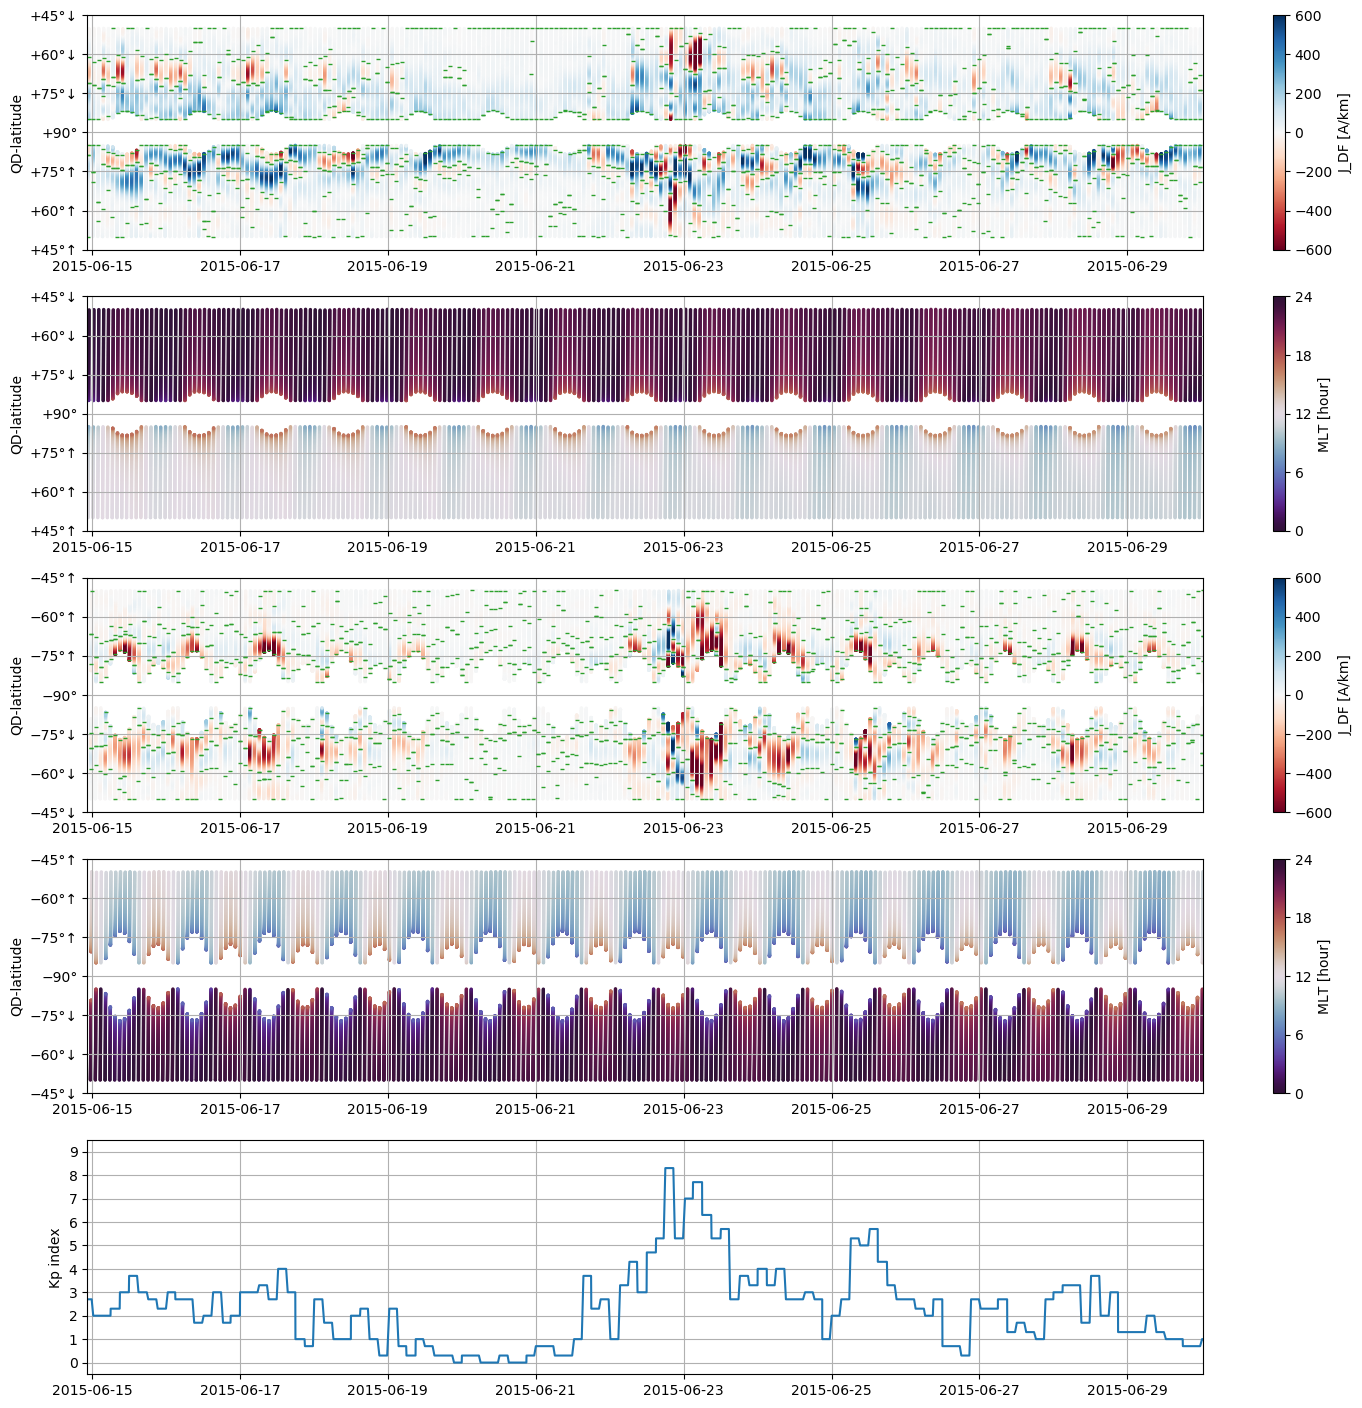

In [2]:
from numpy import stack
from matplotlib.pyplot import figure, subplot, show, colorbar
import matplotlib.cm as color_map
from matplotlib.colors import Normalize
%matplotlib inline

def halign_axes(ax, ax_ref):
    "Align axes horizontally."
    pos_ref = ax_ref.get_position()
    pos = ax.get_position()
    ax.set_position([pos_ref.x0, pos.y0, pos_ref.width, pos.height]) 

def _orbit_lat(latitude, orbit_direction):
    orbit_latitude = latitude.copy()
    mask = orbit_direction == -1
    orbit_latitude[mask] = 180 - latitude[mask] 
    orbit_latitude[orbit_latitude > 180] -= 360 
    return orbit_latitude


def _get_pair_indices(time, pair_indicator):
    idx_start = (pair_indicator == PI_START).nonzero()[0]
    idx_stop = (pair_indicator == PI_STOP).nonzero()[0]
    if idx_start.size > 0 and idx_stop.size > 0:
        if time[idx_start[0]] > time[idx_stop[0]]:
            idx_stop = idx_stop[1:]
        if time[idx_start[-1]] > time[idx_stop[-1]]:
            idx_start = idx_start[:-1]
    assert idx_start.size == idx_start.size
    return stack((idx_start, idx_stop), axis=1)

def _periodic_qd_plot(ax, is_north):
    if is_north:
        ylim = [45, 135]
        yticks = [45, 60, 75, 90, 105, 120, 135]
        ylabels = ['+45\u00B0\u2191', '+60\u00B0\u2191', '+75\u00B0\u2191', '+90\u00B0', '+75\u00B0\u2193', '+60\u00B0\u2193', '+45\u00B0\u2193']
    else:
        ylim = [-135, -45]
        yticks = [-135, -120, -105, -90, -75, -60, -45]
        ylabels = ['\u221245\u00B0\u2193', '\u221260\u00B0\u2193', '\u221275\u00B0\u2193', '\u221290\u00B0', '\u221275\u00B0\u2191', '\u221260\u00B0\u2191', '\u221245\u00B0\u2191']
    ax.set_ylim(ylim)
    ax.set_yticks(yticks)
    ax.set_yticklabels(ylabels)

def plot_j_df(ax, is_north=True, jmax=600):
    p_time = profile['Timestamp'].values
    p_j_df = profile['J_DF_SemiQD'].values
    p_lat_qd = _orbit_lat(
        profile['Latitude_QD'].values,
        profile['QDOrbitDirection'].values
    )
    b_mask = boundaries['PointType'].values & MASK_POINT_TYPE == PT_BOUNDARY
    b_time = boundaries['Timestamp'].values[b_mask]
    b_j_df = boundaries['J_DF_SemiQD'].values[b_mask]
    b_lat_qd = _orbit_lat(
        boundaries['Latitude_QD'].values[b_mask],
        boundaries['QDOrbitDirection'].values[b_mask]
    )

    l_j_df = ax.scatter(p_time, p_lat_qd, c=p_j_df, s=2, cmap=color_map.RdBu, norm=Normalize(-jmax, jmax))
    l_b = ax.plot(b_time, b_lat_qd, '_', c='tab:green', ms=3)
    cax = colorbar(l_j_df)    
    cax.ax.set_ylabel("J_DF [A/km]")
    ax.grid()
    ax.set_ylabel('QD-latitude')
    ax.set_xlim(start_time, end_time)
    _periodic_qd_plot(ax, is_north)
    return ax

def plot_mlt(ax, is_north=True):
    p_time = profile['Timestamp'].values
    p_mlt = profile['MLT_QD'].values % 24
    p_lat_qd = _orbit_lat(
        profile['Latitude_QD'].values,
        profile['QDOrbitDirection'].values
    )   
    l_mlt = ax.scatter(p_time, p_lat_qd, c=p_mlt, s=2, cmap=color_map.twilight_shifted, norm=Normalize(0, 24))
    cax = colorbar(l_mlt)    
    cax.ax.set_ylabel("MLT [hour]")
    cax.set_ticks([0, 6, 12, 18, 24])
    ax.grid()
    ax.set_ylabel('QD-latitude')
    ax.set_xlim(start_time, end_time)
    _periodic_qd_plot(ax, is_north)
    return ax


def plot_kp(ax, is_north=True):
    b_time = boundaries['Timestamp'].values
    b_kp = boundaries['Kp'].values
    ax.plot(b_time, b_kp)
    ax.grid()
    ax.set_yticks(range(0, 10))
    ax.set_ylim([-0.5, 9.5])
    ax.set_xlim(start_time, end_time)
    ax.set_ylabel('Kp index')
    return ax
    

fig = figure(figsize=(18, 18), dpi=100)

jmax = 600  #A/km
ax_jn = plot_j_df(subplot(511), is_north=True, jmax=jmax)
ax_mn = plot_mlt(subplot(512), is_north=True)
ax_js = plot_j_df(subplot(513), is_north=False, jmax=jmax)
ax_ms = plot_mlt(subplot(514), is_north=False)
ax_kp = plot_kp(subplot(515))

halign_axes(ax_mn, ax_jn)
halign_axes(ax_js, ax_jn)
halign_axes(ax_ms, ax_jn)
halign_axes(ax_kp, ax_jn)